# CARBON EMISSION

In [116]:
import pandas as pd #pembuatan dataframe dan visualisasi data
import numpy as np #operasi numerik
import matplotlib.pyplot as plt #visualisasi data
import seaborn as sns #visualisasi data
import plotly.express as px #import plot
import scipy as sp
import math


## Data Collection

In [117]:
df = pd.read_csv("https://raw.githubusercontent.com/AlvitoDwiP/carbon-emission/refs/heads/main/data/raw/owid-co2-data.csv", delimiter=',')
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data ini menggambarkan negara-negara yang mempunyai gas emisi dari range tahun 1750-2024.

### filter data
data emisi difilter menjadi hanya negara-negara ASEAN saja

In [118]:
asean = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines', 'Brunei', 'Vietnam', 'Laos', 'Myanmar', 'Cambodia']
df = df [df['country'].isin(asean)]
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
7388,Brunei,1750,BRN,8817.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7389,Brunei,1751,BRN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7390,Brunei,1752,BRN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7391,Brunei,1753,BRN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7392,Brunei,1754,BRN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49332,Vietnam,2020,VNM,98079196.0,7.526296e+11,60.066,0.612,362.599,23.287,6.863,...,NaN,0.662,0.004,0.006,0.010,0.0,579.987,412.028,-102.706,-28.325
49333,Vietnam,2021,VNM,98935101.0,7.719120e+11,62.071,0.627,314.197,-48.402,-13.349,...,NaN,0.668,0.004,0.006,0.011,0.0,528.790,365.921,-91.876,-29.241
49334,Vietnam,2022,VNM,99680656.0,8.338039e+11,55.979,0.562,322.653,8.457,2.691,...,NaN,0.673,0.004,0.007,0.011,0.0,539.141,373.927,-94.756,-29.368
49335,Vietnam,2023,VNM,100352189.0,NaN,44.488,0.443,347.399,24.746,7.669,...,NaN,0.679,0.004,0.007,0.011,0.0,564.164,399.984,-99.611,-28.673


setelah data difilter menjadi negara ASEAN saja, selanjutnya data difilter ulang dari tahun 2000 sampai 2024

In [119]:
df = df[(df['year'] >= 2000) & (df['year'] <= 2024)]
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
7638,Brunei,2000,BRN,326429.0,NaN,0.000,0.000,5.886,-0.092,-1.537,...,NaN,0.017,0.000,0.000,0.000,0.0,9.218,8.123,-2.344,-39.830
7639,Brunei,2001,BRN,333353.0,NaN,0.000,0.000,5.758,-0.128,-2.178,...,NaN,0.017,0.000,0.000,0.000,0.0,9.554,8.428,-2.237,-38.852
7640,Brunei,2002,BRN,340108.0,NaN,0.000,0.000,5.285,-0.473,-8.206,...,NaN,0.017,0.000,0.000,0.000,0.0,8.517,7.424,-1.717,-32.479
7641,Brunei,2003,BRN,346650.0,NaN,0.000,0.000,6.140,0.854,16.162,...,NaN,0.018,0.000,0.000,0.000,0.0,9.600,8.381,-0.516,-8.412
7642,Brunei,2004,BRN,352921.0,NaN,0.000,0.000,5.967,-0.173,-2.817,...,NaN,0.018,0.000,0.000,0.000,0.0,8.826,7.879,-0.508,-8.519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49332,Vietnam,2020,VNM,98079196.0,7.526296e+11,60.066,0.612,362.599,23.287,6.863,...,NaN,0.662,0.004,0.006,0.010,0.0,579.987,412.028,-102.706,-28.325
49333,Vietnam,2021,VNM,98935101.0,7.719120e+11,62.071,0.627,314.197,-48.402,-13.349,...,NaN,0.668,0.004,0.006,0.011,0.0,528.790,365.921,-91.876,-29.241
49334,Vietnam,2022,VNM,99680656.0,8.338039e+11,55.979,0.562,322.653,8.457,2.691,...,NaN,0.673,0.004,0.007,0.011,0.0,539.141,373.927,-94.756,-29.368
49335,Vietnam,2023,VNM,100352189.0,NaN,44.488,0.443,347.399,24.746,7.669,...,NaN,0.679,0.004,0.007,0.011,0.0,564.164,399.984,-99.611,-28.673


Data telah difilter menjadi hanya ASEAN dan range tahun 24 tahun (2000-2024)

In [120]:
df.shape

(250, 79)

Data ini berjumlah 250 baris dan 79 kolom

## Data Understanding


checking variabel apa saja yang terdapat dalam dataset

In [121]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [122]:
#count numerical and categorical data
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns) - set(num_cols))
print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  Index(['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita',
       'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc',
       'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
       'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
       'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita',
       'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_c

Berdasarkan *output* di atas, diperoleh kolom numerik atau `numerical columns `yang terdiri dari data kuantitatif dimana memuat tipe data numerik, yaitu integer dan float. Dan kolom kategorik atau 'categorical columns' yang terdiri dari data kualitatif dimana memuat tipe data string, yaitu text.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 7638 to 49336
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    250 non-null    object 
 1   year                                       250 non-null    int64  
 2   iso_code                                   250 non-null    object 
 3   population                                 250 non-null    float64
 4   gdp                                        207 non-null    float64
 5   cement_co2                                 250 non-null    float64
 6   cement_co2_per_capita                      250 non-null    float64
 7   co2                                        250 non-null    float64
 8   co2_growth_abs                             250 non-null    float64
 9   co2_growth_prct                            250 non-null    float64
 10  co2_including_luc         

`float` merupakan tipe data numerik untuk menyimpan bilangan decimal. Dalam analisis ini, tipe data float terdiri dari seluruh variabel, kecuali year, country dan iso_code. Sedangkan, `integer` (int) merupa tipe data numerik untuk menyimpat bilang bulat. Dalam analisis, tipe data integer adalah `year`. Kemudian, terdapat `text` merupakan tipe data string terdiri dari : `country` dan `iso_code`.

### Interpretasi data emisi
Berdasarkan output diatas, diperoleh jumlah baris pada dataframe, yaitu sejumlah 250 baris dan 79 kolom.

> Terdapat baris yang bernilai o (nol) pada dataset sehingga tidak diperlukan dalam analisis, yaitu `cumulative_other_co2, other_co2_per_capita, other_industry_co2, share_global_cumulative_other_co2, share_global_other_co2`. Oleh karena itu, 5 variabel ini perlu dipisahkan dari dataframe.

> Terdapat baris yang jumlahnya kurang dari setengah enties dataframe sehingga diperlukan pengeluaran variabel untuk menghindari analisis dan output yang kurang valid. Adapun variabel itu, antara lain :
`'cumulative_other_co2', 'other_co2_per_capita', 'other_industry_co2', 'share_global_cumulative_other_co2', 'share_global_other_co2', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
              'co2_per_gdp', 'co2_per_unit_energy',  'consumption_co2',  'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'energy_per_capita', 'energy_per_gdp', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
              'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'primary_energy_consumption', 'share_global_cumulative_flaring_co2', 'share_global_flaring_co2', 'total_ghg', 'total_ghg_excluding_lucf',
              'trade_co2', 'trade_co2_share'`

## Preprocessing Data

In [124]:
# menghapus variabel dengan jumlah barisnya tidak mencapai setengah jumlah keseluruhan baris dataframe
df = df.drop(['cumulative_other_co2', 'other_co2_per_capita', 'other_industry_co2', 'share_global_cumulative_other_co2', 'share_global_other_co2', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
              'co2_per_gdp', 'co2_per_unit_energy',  'consumption_co2',  'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'energy_per_capita', 'energy_per_gdp', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
              'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'primary_energy_consumption', 'share_global_cumulative_flaring_co2', 'share_global_flaring_co2', 'total_ghg', 'total_ghg_excluding_lucf',
              'trade_co2', 'trade_co2_share'], axis=1)
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
7638,Brunei,2000,BRN,326429.0,NaN,0.000,0.000,5.886,-0.092,-1.537,...,0.010,0.016,0.089,0.018,0.014,0.017,0.000,0.000,0.000,0.0
7639,Brunei,2001,BRN,333353.0,NaN,0.000,0.000,5.758,-0.128,-2.178,...,0.010,0.016,0.082,0.019,0.014,0.017,0.000,0.000,0.000,0.0
7640,Brunei,2002,BRN,340108.0,NaN,0.000,0.000,5.285,-0.473,-8.206,...,0.010,0.016,0.075,0.016,0.013,0.017,0.000,0.000,0.000,0.0
7641,Brunei,2003,BRN,346650.0,NaN,0.000,0.000,6.140,0.854,16.162,...,0.010,0.015,0.088,0.014,0.013,0.018,0.000,0.000,0.000,0.0
7642,Brunei,2004,BRN,352921.0,NaN,0.000,0.000,5.967,-0.173,-2.817,...,0.010,0.015,0.085,0.012,0.012,0.018,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49332,Vietnam,2020,VNM,98079196.0,7.526296e+11,60.066,0.612,362.599,23.287,6.863,...,1.141,0.224,0.225,2.632,0.626,0.662,0.004,0.006,0.010,0.0
49333,Vietnam,2021,VNM,98935101.0,7.719120e+11,62.071,0.627,314.197,-48.402,-13.349,...,1.147,0.230,0.183,2.389,0.557,0.668,0.004,0.006,0.011,0.0
49334,Vietnam,2022,VNM,99680656.0,8.338039e+11,55.979,0.562,322.653,8.457,2.691,...,1.154,0.238,0.200,2.388,0.611,0.673,0.004,0.007,0.011,0.0
49335,Vietnam,2023,VNM,100352189.0,NaN,44.488,0.443,347.399,24.746,7.669,...,1.160,0.246,0.184,2.414,0.637,0.679,0.004,0.007,0.011,0.0


In [125]:
#melihat apakah terdapat missing value atau tidak
df.isnull().any()

,0
country,False
year,False
iso_code,False
population,False
gdp,True
cement_co2,False
cement_co2_per_capita,False
co2,False
co2_growth_abs,False
co2_growth_prct,False


In [126]:
# checking missing value dengan persentase
(df.isnull().sum() / len(df)) * 100

,0
country,0.0
year,0.0
iso_code,0.0
population,0.0
gdp,17.2
cement_co2,0.0
cement_co2_per_capita,0.0
co2,0.0
co2_growth_abs,0.0
co2_growth_prct,0.0


**Interpretation**

Setelah dilakukan penghapusan variabel untuk variabel dengan jumlah kurang dari setengah seluruh baris dataframe. Dalam penelitian ini, kami ingin memfokuskan variabel mana saja yang tidak terlibat dalam variabel respon (cumulative_co2_including_luc).
> Adapun variabel, antara lain : `share_global_cement_co2, share_global_co2 , share_global_co2_including_luc, share_global_coal_co2, share_global_cumulative_cement_co2, share_global_cumulative_co2, share_global_cumulative_co2_including_luc, share_global_cumulative_coal_co2, share_global_cumulative_gas_co2, share_global_cumulative_luc_co2, share_global_cumulative_oil_co2, share_global_gas_co2, share_global_luc_co2, share_global_oil_co2, share_of_temperature_change_from_ghg, temperature_change_from_ch4, temperature_change_from_co2, temperature_change_from_ghg, temperature_change_from_n2o`



In [127]:
# menghapus variabel dengan jumlah barisnya tidak mencapai setengah jumlah keseluruhan baris dataframe dan variabel yang tidak terikat dengan penelitian
df_final = df.drop(['cement_co2', 'cement_co2_per_capita', 'coal_co2_per_capita', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_per_capita',
              'cumulative_cement_co2', 'cumulative_co2', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2','flaring_co2', 'flaring_co2_per_capita','gas_co2', 'gas_co2_per_capita',
              'iso_code', 'land_use_change_co2_per_capita', 'oil_co2_per_capita','share_global_cement_co2', 'share_global_co2' , 'share_global_co2_including_luc', 'share_global_coal_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
              'share_global_cumulative_co2_including_luc', 'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2', 'share_global_cumulative_oil_co2', 'share_global_gas_co2', 'share_global_luc_co2',
              'share_global_oil_co2', 'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4', 'temperature_change_from_co2', 'temperature_change_from_ghg', 'temperature_change_from_n2o'], axis=1)
df_final

,country,year,population,gdp,co2,coal_co2,cumulative_co2_including_luc,land_use_change_co2,oil_co2
7638,Brunei,2000,326429.0,NaN,5.886,NaN,281.498,1.079,1.400
7639,Brunei,2001,333353.0,NaN,5.758,NaN,288.298,1.042,1.472
7640,Brunei,2002,340108.0,NaN,5.285,NaN,294.561,0.978,1.334
7641,Brunei,2003,346650.0,NaN,6.140,NaN,301.759,1.059,1.378
7642,Brunei,2004,352921.0,NaN,5.967,NaN,308.503,0.776,1.334
...,...,...,...,...,...,...,...,...,...
49332,Vietnam,2020,98079196.0,7.526296e+11,362.599,215.960,13015.111,118.866,68.385
49333,Vietnam,2021,98935101.0,7.719120e+11,314.197,172.613,13440.584,111.275,64.083
49334,Vietnam,2022,99680656.0,8.338039e+11,322.653,177.248,13877.494,114.257,72.805
49335,Vietnam,2023,100352189.0,NaN,347.399,209.114,14339.461,114.569,78.204


In [128]:
#menghilangkan noise dengan mengganti nama variabel supaya lebih menarik dan efisien
df_final = df_final.rename(columns = {
    'coal_co2' : 'coal co2' ,
    'cumulative_co2_including_luc' : 'cumulative co2' ,
    'land_use_change_co2' : 'land use' ,
    'oil_co2' : 'oil co2'
})
df_final.head()

,country,year,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
7638,Brunei,2000,326429.0,NaN,5.886,NaN,281.498,1.079,1.400
7639,Brunei,2001,333353.0,NaN,5.758,NaN,288.298,1.042,1.472
7640,Brunei,2002,340108.0,NaN,5.285,NaN,294.561,0.978,1.334
7641,Brunei,2003,346650.0,NaN,6.140,NaN,301.759,1.059,1.378
7642,Brunei,2004,352921.0,NaN,5.967,NaN,308.503,0.776,1.334


In [129]:
# mengisi kekosongan nilai dengan nilai rata-rata pada setiap kolom

for column in df_final.columns:
    # Hitung nilai rerata dari kolom tersebut
    mean_value_1 = df_final['gdp'].mean()
    mean_value_2 = df_final['co2'].mean()
    mean_value_3 = df_final['coal co2'].mean()
    mean_value_4 = df_final['cumulative co2'].mean()
    mean_value_5 = df_final['oil co2'].mean()
    # Isi kekosongan nilai pada setiap baris dengan nilai rerata
    df_final['gdp'] = df_final['gdp'].fillna(mean_value_1)
    df_final['co2'] = df_final['co2'].fillna(mean_value_2)
    df_final['coal co2'] = df_final['coal co2'].fillna(mean_value_3)
    df_final['cumulative co2'] = df_final['cumulative co2'].fillna(mean_value_4)
    df_final['oil co2'] = df_final['oil co2'].fillna(mean_value_5)


# Tampilkan hasil setelah mengisi kekosongan nilai
df_final

,country,year,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
7638,Brunei,2000,326429.0,5.969890e+11,5.886,50.837776,281.498,1.079,1.400
7639,Brunei,2001,333353.0,5.969890e+11,5.758,50.837776,288.298,1.042,1.472
7640,Brunei,2002,340108.0,5.969890e+11,5.285,50.837776,294.561,0.978,1.334
7641,Brunei,2003,346650.0,5.969890e+11,6.140,50.837776,301.759,1.059,1.378
7642,Brunei,2004,352921.0,5.969890e+11,5.967,50.837776,308.503,0.776,1.334
...,...,...,...,...,...,...,...,...,...
49332,Vietnam,2020,98079196.0,7.526296e+11,362.599,215.960000,13015.111,118.866,68.385
49333,Vietnam,2021,98935101.0,7.719120e+11,314.197,172.613000,13440.584,111.275,64.083
49334,Vietnam,2022,99680656.0,8.338039e+11,322.653,177.248000,13877.494,114.257,72.805
49335,Vietnam,2023,100352189.0,5.969890e+11,347.399,209.114000,14339.461,114.569,78.204


In [130]:
# melihat jumlah missing value
df_final.isna().sum()

,0
country,0
year,0
population,0
gdp,0
co2,0
coal co2,0
cumulative co2,0
land use,0
oil co2,0


In [131]:
# statistik deskriptif
summary_stats = df_final.describe()
summary_stats

,year,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
count,250.000000,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2012.000000,6.154317e+07,5.969890e+11,133.223872,50.837776,14341.750596,152.788400,50.923932
std,7.225568,7.246434e+07,6.343036e+11,161.696782,70.495988,19801.166409,265.738646,59.202411
min,2000.000000,3.264290e+05,1.220929e+10,0.960000,0.000000,281.498000,0.065000,0.883000
25%,2006.000000,6.542082e+06,1.923584e+11,11.882500,1.742500,2161.156250,33.146000,4.773000
50%,2012.000000,4.042426e+07,5.153326e+11,53.927000,35.628000,8291.821000,76.138000,31.892500
75%,2018.000000,8.506480e+07,6.843036e+11,223.319000,64.514500,15411.742750,120.334250,73.287250
max,2024.000000,2.834879e+08,3.500094e+12,812.220000,436.117000,86936.609000,1792.642000,243.183000


In [132]:
# checking duplicated data in dataframe
df_final.duplicated().sum()

np.int64(0)

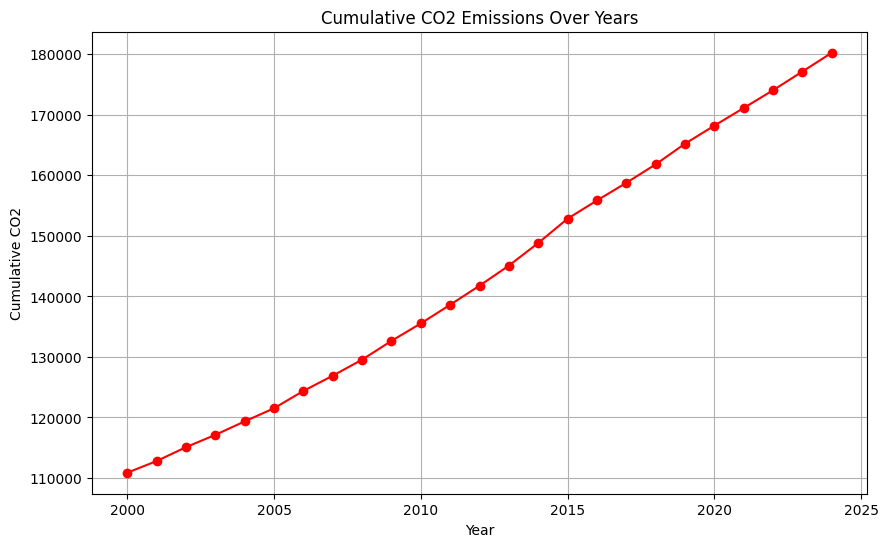

In [133]:
# Filter hanya untuk negara-negara tertentu
countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines',
             'Brunei', 'Vietnam', 'Laos', 'Myanmar', 'Cambodia']
filtered_df = df_final[df_final['country'].isin(countries)]

# Group berdasarkan 'year' dan hitung jumlah 'cumulative co2'
grouped_df = filtered_df.groupby('year')['cumulative co2'].sum().reset_index()

grouped_df_50 = grouped_df[grouped_df['year'] >= 2000]

plt.figure(figsize=(10, 6))
plt.plot(grouped_df_50['year'], grouped_df_50['cumulative co2'], marker='o', color='red')  # Membuat scatter plot
plt.title('Cumulative CO2 Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative CO2')
plt.grid(True)

# Menyimpan grafik sebagai file PNG
plt.savefig('cumulative_co2_scatter_plot.png', dpi=300)
plt.show()

**Interpretation of Preprocessing Data**

Setelah dilakukan indentification dan checking, terlihat bahwa tidak adanya missing value dan duplikasi data pada dataset *df_final* sehingga data siap untuk dianalisis.

In [134]:
# Assuming df_final is your DataFrame
df_final.to_csv('df_final.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Preprocessing
kelompokkan tahun menjadi per 4 tahun agar tampilan visualnya tidak terlalu banyak

In [135]:
# buat dataframe per 4 tahun
df_final['per 4 years'] = (df_final['year'] // 4) * 4

df_final_4years = df_final.groupby('per 4 years').agg({
    'population': ['sum', 'mean'],
    'gdp': ['sum', 'mean'],
    'co2': ['sum', 'mean'],
    'coal co2': ['sum', 'mean'],
    'land use': ['sum', 'mean'],
    'oil co2': ['sum', 'mean'],
    'cumulative co2': ['sum', 'mean']
}).reset_index()

df_final_4years.columns = ['per 4 years', 'total population', 'average population',
                           'total gdp', 'average gdp',
                           'total co2', 'average co2',
                           'total coal co2', 'average coal co2',
                           'total land use', 'average land use',
                           'total oil co2', 'average oil co2',
                           'total cumulative co2', 'average cumulative co2']
df_final_4years


,per 4 years,total population,average population,total gdp,average gdp,total co2,average co2,total coal co2,average coal co2,total land use,average land use,total oil co2,average oil co2,total cumulative co2,average cumulative co2
0,2000,2.150703e+09,5.376757e+07,1.456878e+13,3.642196e+11,3271.719,81.792975,1047.028206,26.175705,5103.249,127.581225,1672.384,41.809600,455900.410,11397.510250
1,2004,2.268829e+09,5.672072e+07,1.784193e+13,4.460483e+11,3892.396,97.309900,1382.465206,34.561630,5880.418,147.010450,1747.348,43.683700,492164.663,12304.116575
2,2008,2.395011e+09,5.987529e+07,2.166451e+13,5.416128e+11,4569.782,114.244550,1546.994103,38.674853,7145.232,178.630800,1864.081,46.602025,536360.668,13409.016700
3,2012,2.519910e+09,6.299774e+07,2.628312e+13,6.570781e+11,5484.790,137.119750,1914.490103,47.862253,8739.878,218.496950,2159.118,53.977950,588528.521,14713.213025
4,2016,2.633049e+09,6.582623e+07,3.156849e+13,7.892123e+11,6607.627,165.190675,2631.194327,65.779858,5779.765,144.494125,2329.601,58.240025,641662.628,16041.565700
5,2020,2.724541e+09,6.811352e+07,3.135052e+13,7.837630e+11,7419.784,185.494600,3241.875000,81.046875,4504.015,112.600375,2317.254,57.931350,690562.519,17264.062975
6,2024,6.937488e+08,6.937488e+07,5.969890e+12,5.969890e+11,2059.870,205.987000,945.397000,94.539700,1044.543,104.454300,641.197,64.119700,180258.240,18025.824000


**Interpretation of Data per 4 years**

Telah dilakukan pengelompokkan pada dataframe per 10 tahun dengan membuat dataframe baru, berisi decades (per 4 tahun), kolom sum dan mean untuk setiap variabel yang ingin dianalisis.





In [136]:
df_final_4years.to_csv('df_final_4years.csv', index=False)

from google.colab import files
files.download('df_final_4years.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA
df_final_outlier_handling digunakan untuk proses analisis dan modelling.

### Handling Outlier

In [137]:
df_final_outlier_checking = df_final.drop(columns=['country', 'year', 'per 4 years'])
df_final_outlier_checking


,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
7638,326429.0,5.969890e+11,5.886,50.837776,281.498,1.079,1.400
7639,333353.0,5.969890e+11,5.758,50.837776,288.298,1.042,1.472
7640,340108.0,5.969890e+11,5.285,50.837776,294.561,0.978,1.334
7641,346650.0,5.969890e+11,6.140,50.837776,301.759,1.059,1.378
7642,352921.0,5.969890e+11,5.967,50.837776,308.503,0.776,1.334
...,...,...,...,...,...,...,...
49332,98079196.0,7.526296e+11,362.599,215.960000,13015.111,118.866,68.385
49333,98935101.0,7.719120e+11,314.197,172.613000,13440.584,111.275,64.083
49334,99680656.0,8.338039e+11,322.653,177.248000,13877.494,114.257,72.805
49335,100352189.0,5.969890e+11,347.399,209.114000,14339.461,114.569,78.204


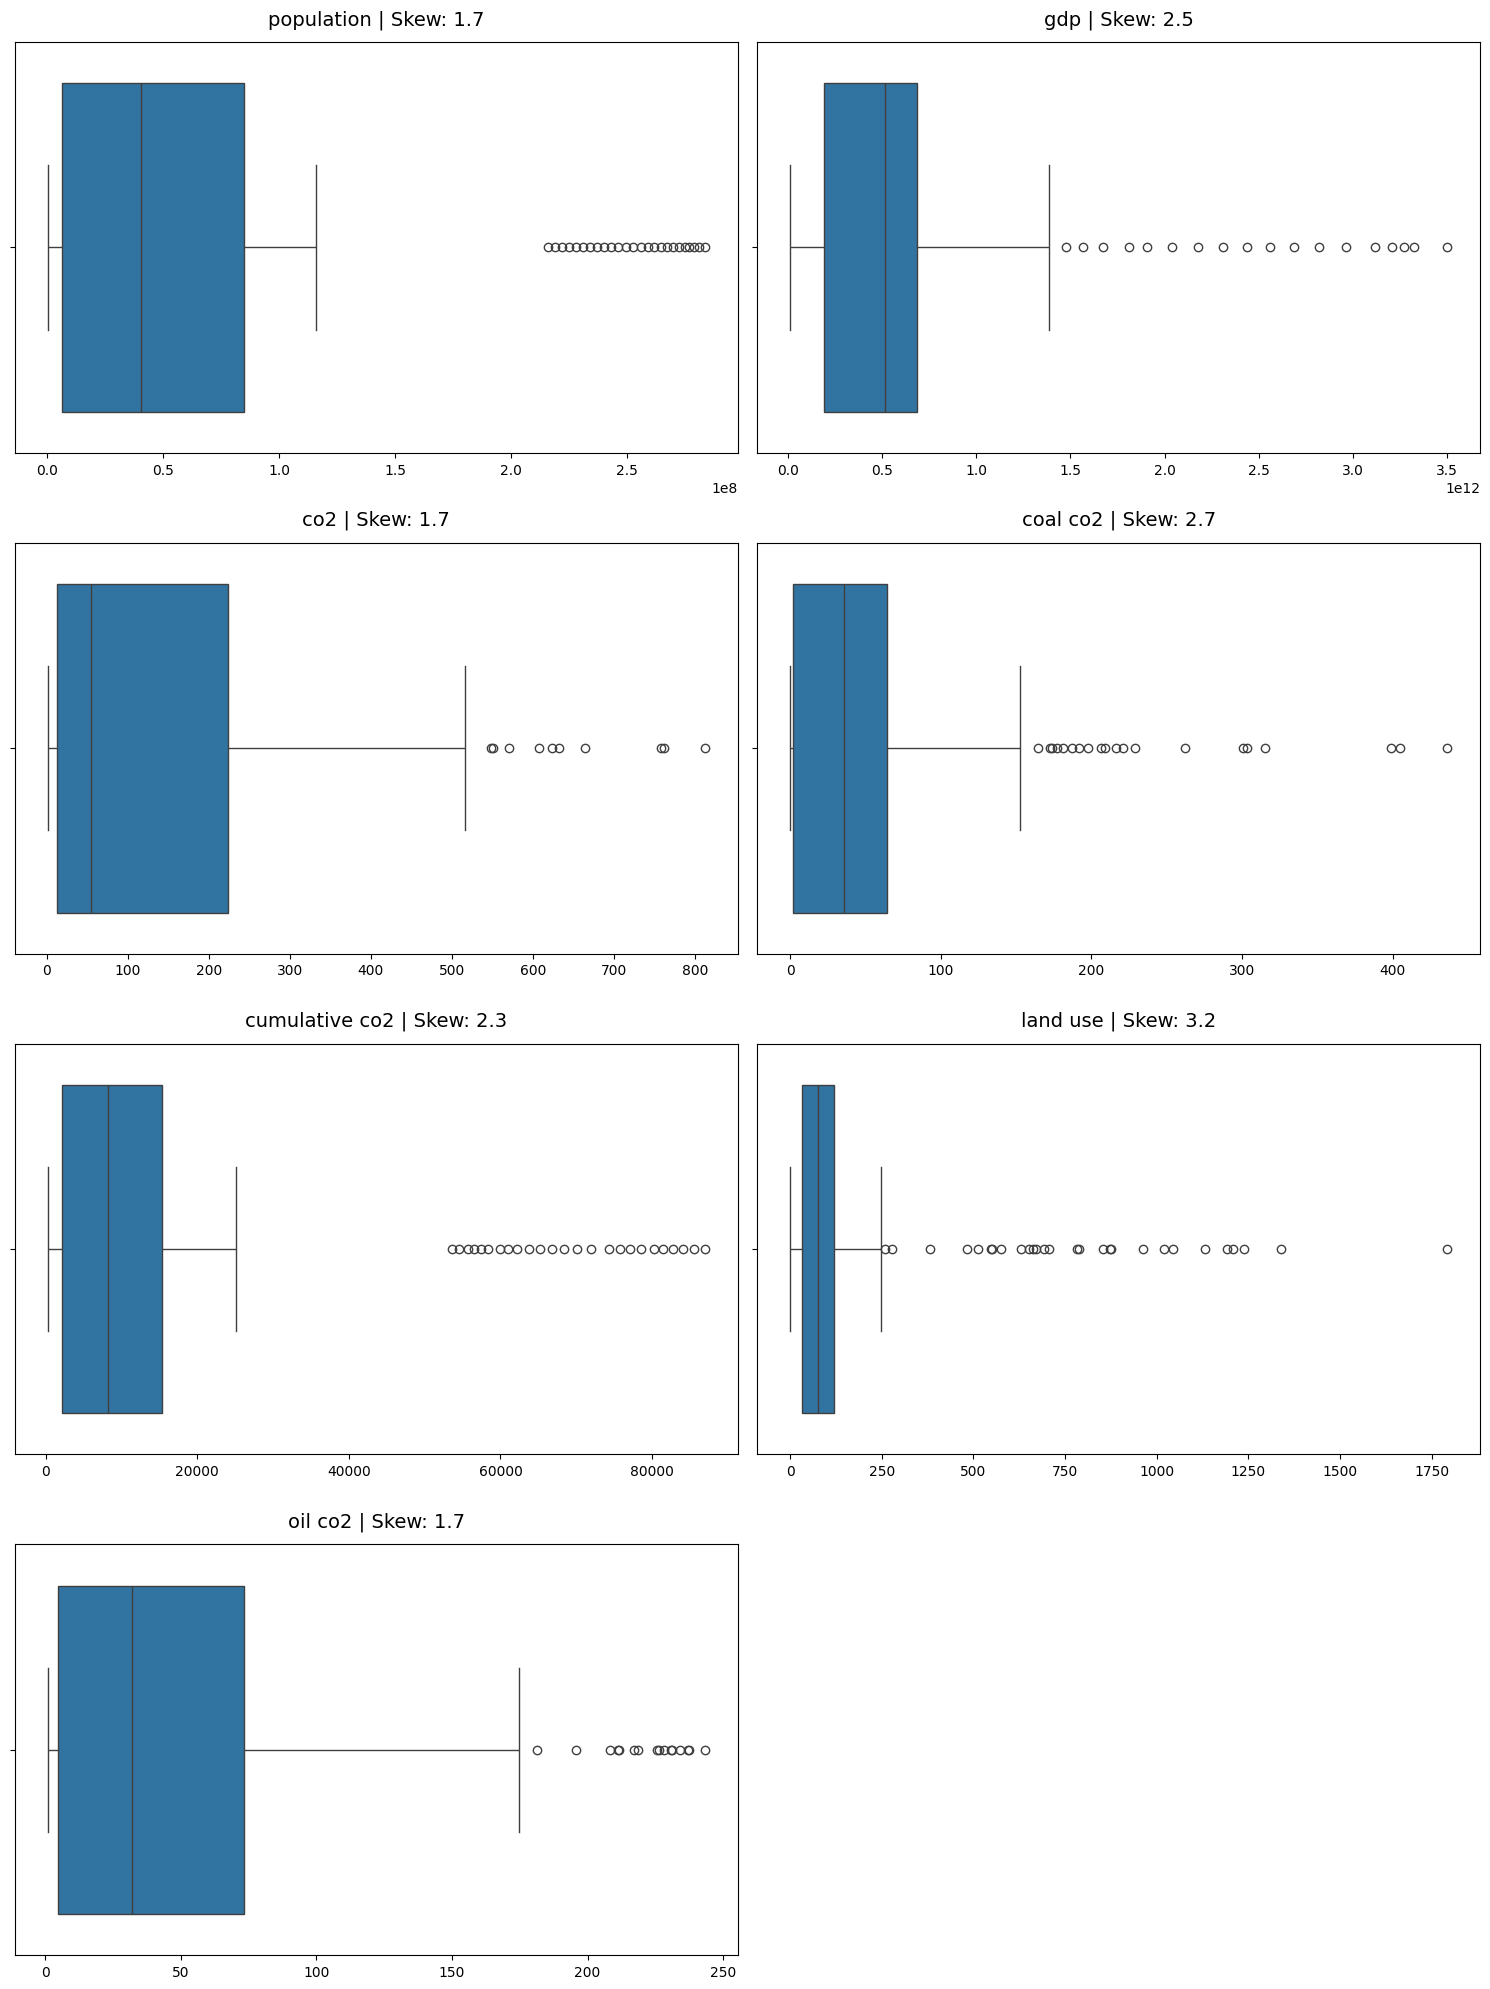

In [138]:
# pastikan hanya kolom numerik
plot_df = df_final_outlier_checking.select_dtypes(include='number')

n_cols = 2
n_rows = math.ceil(len(plot_df.columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(plot_df.columns):
    sns.boxplot(x=plot_df[column], ax=axes[i])
    skew_val = round(plot_df[column].skew(), 1)
    axes[i].set_title(f"{column} | Skew: {skew_val}", fontsize=14, pad=13)
    axes[i].set_xlabel("")

# hapus subplot kosong
for j in range(len(plot_df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Interpretation**

Berdasarkan boxplot di atas, seluruh variabel terdapat outlier upper bound yang lumayan banyak. Langkah selanjutnya outlier akan di-handling dengan metode IQR.

* Jika variabel memiliki utlier <3% maka outlier akan dihapus
* Jika variabel terdapat outlier dengan range 3--25% maka akan dilakukan capping
* Jika variabel terdapat outlier >25% maka variabel tersebut dibiarkan tanpa di handling

In [139]:
# Menampilkan outlier dengan persentase
for col in df_final_outlier_checking.select_dtypes(include='number').columns:
    s = df_final_outlier_checking[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    outliers = s[(s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)]
    perc = (len(outliers) / len(s)) * 100 if len(s) > 0 else 0
    print(f"Kolom {col} memiliki outlier sebanyak  = {perc:.2f}%")


Kolom population memiliki outlier sebanyak  = 10.00%
Kolom gdp memiliki outlier sebanyak  = 7.20%
Kolom co2 memiliki outlier sebanyak  = 4.00%
Kolom coal co2 memiliki outlier sebanyak  = 8.00%
Kolom cumulative co2 memiliki outlier sebanyak  = 10.00%
Kolom land use memiliki outlier sebanyak  = 11.20%
Kolom oil co2 memiliki outlier sebanyak  = 6.40%


In [140]:
# Menampilkan outlier dengan jumlah
for col in df_final_outlier_checking.select_dtypes(include='number').columns:
    s = df_final_outlier_checking[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    outliers = s[(s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)]
    print(f"Kolom {col} memiliki outlier sebanyak = {len(outliers)}")

Kolom population memiliki outlier sebanyak = 25
Kolom gdp memiliki outlier sebanyak = 18
Kolom co2 memiliki outlier sebanyak = 10
Kolom coal co2 memiliki outlier sebanyak = 20
Kolom cumulative co2 memiliki outlier sebanyak = 25
Kolom land use memiliki outlier sebanyak = 28
Kolom oil co2 memiliki outlier sebanyak = 16


Setelah dilihat presentase outliernya, semua variabel menunjukkan presentase outlier dengan range 6-12%, maka semua variabel akan dilakukan capping outlier

In [141]:
# Capping outlier
df_final_outlier_handling = df_final.drop(
    columns=['country', 'year', 'per 4 years'],
    errors='ignore'
)

# Install (jalankan sekali saja di Colab)
!pip install -q feature-engine

from feature_engine.outliers import Winsorizer

# Membuat capper
winsoriser = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['population', 'gdp', 'co2', 'cumulative co2', 'land use', 'oil co2', 'coal co2']
)

winsoriser.fit(df_final_outlier_handling)
df_final_outlier_handling_done = winsoriser.transform(df_final_outlier_handling)

df_final_outlier_handling_done.head()


,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
7638,326429.0,5.969890e+11,5.886,50.837776,281.498,1.079,1.400
7639,333353.0,5.969890e+11,5.758,50.837776,288.298,1.042,1.472
7640,340108.0,5.969890e+11,5.285,50.837776,294.561,0.978,1.334
7641,346650.0,5.969890e+11,6.140,50.837776,301.759,1.059,1.378
7642,352921.0,5.969890e+11,5.967,50.837776,308.503,0.776,1.334


In [142]:
# Inspect the minimum caps for each variable
print('Batas Minimum Caps  :', winsoriser.left_tail_caps_)

# Inspect the maximum caps for each variable
print('Batas Maksimum Caps :', winsoriser.right_tail_caps_)


Batas Minimum Caps  : {'population': -111241996.125, 'gdp': -545559406318.125, 'co2': -305.27225, 'cumulative co2': -17714.7235, 'land use': -97.636375, 'oil co2': -97.99837500000001, 'coal co2': -92.4155}
Batas Maksimum Caps : {'population': 202848878.875, 'gdp': 1422221431848.875, 'co2': 540.47375, 'cumulative co2': 35287.6225, 'land use': 251.116625, 'oil co2': 176.058625, 'coal co2': 158.6725}


In [143]:
print('=== Sebelum Capping ===')
display(df_final_outlier_handling.describe().T)

print('=== Setelah Capping ===')
display(df_final_outlier_handling_done.describe().T)


=== Sebelum Capping ===


,count,mean,std,min,25%,50%,75%,max
population,250.0,6.154317e+07,7.246434e+07,3.264290e+05,6.542082e+06,4.042426e+07,8.506480e+07,2.834879e+08
gdp,250.0,5.969890e+11,6.343036e+11,1.220929e+10,1.923584e+11,5.153326e+11,6.843036e+11,3.500094e+12
co2,250.0,1.332239e+02,1.616968e+02,9.600000e-01,1.188250e+01,5.392700e+01,2.233190e+02,8.122200e+02
coal co2,250.0,5.083778e+01,7.049599e+01,0.000000e+00,1.742500e+00,3.562800e+01,6.451450e+01,4.361170e+02
cumulative co2,250.0,1.434175e+04,1.980117e+04,2.814980e+02,2.161156e+03,8.291821e+03,1.541174e+04,8.693661e+04
land use,250.0,1.527884e+02,2.657386e+02,6.500000e-02,3.314600e+01,7.613800e+01,1.203342e+02,1.792642e+03
oil co2,250.0,5.092393e+01,5.920241e+01,8.830000e-01,4.773000e+00,3.189250e+01,7.328725e+01,2.431830e+02


=== Setelah Capping ===


,count,mean,std,min,25%,50%,75%,max
population,250.0,5.666805e+07,5.968139e+07,3.264290e+05,6.542082e+06,4.042426e+07,8.506480e+07,2.028489e+08
gdp,250.0,5.200324e+11,3.962037e+11,1.220929e+10,1.923584e+11,5.153326e+11,6.843036e+11,1.422221e+12
co2,250.0,1.287175e+02,1.470010e+02,9.600000e-01,1.188250e+01,5.392700e+01,2.233190e+02,5.404737e+02
coal co2,250.0,4.373855e+01,4.695019e+01,0.000000e+00,1.742500e+00,3.562800e+01,6.451450e+01,1.586725e+02
cumulative co2,250.0,1.094068e+04,1.048987e+04,2.814980e+02,2.161156e+03,8.291821e+03,1.541174e+04,3.528762e+04
land use,250.0,9.008865e+01,7.740843e+01,6.500000e-02,3.314600e+01,7.613800e+01,1.203342e+02,2.511166e+02
oil co2,250.0,4.804028e+01,5.123641e+01,8.830000e-01,4.773000e+00,3.189250e+01,7.328725e+01,1.760586e+02


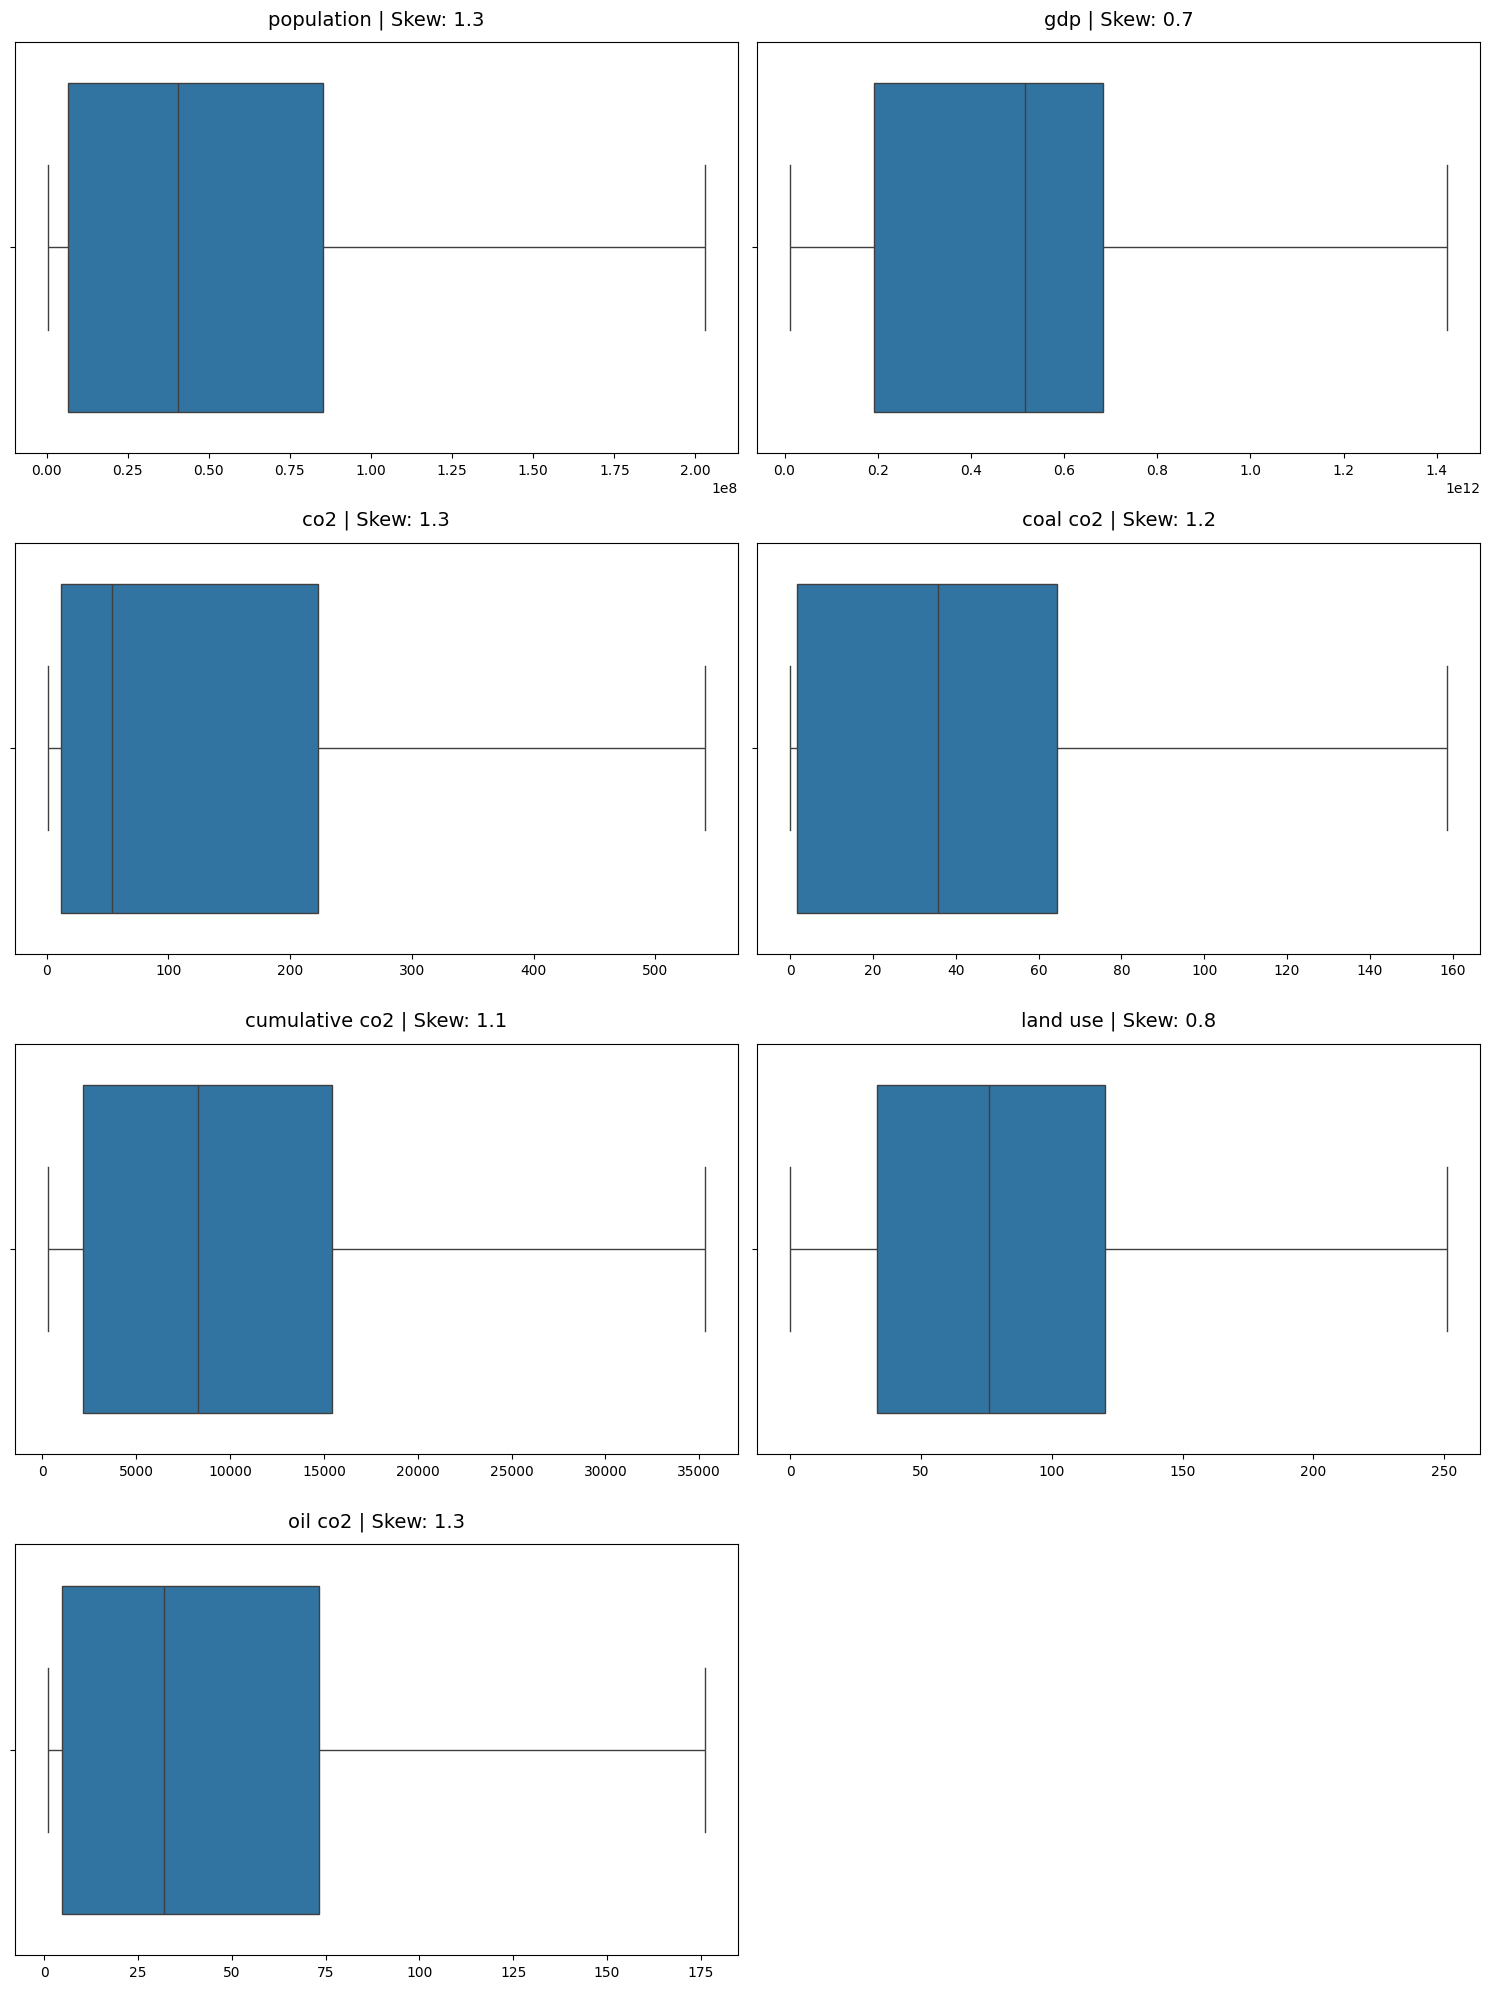

In [144]:
plot_df = df_final_outlier_handling_done.select_dtypes(include='number')

n_cols = 2
n_rows = math.ceil(len(plot_df.columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(plot_df.columns):
    sns.boxplot(x=plot_df[column], ax=axes[i])
    skew_val = round(plot_df[column].skew(), 1)
    axes[i].set_title(f"{column} | Skew: {skew_val}", fontsize=14, pad=13)
    axes[i].set_xlabel("")

for j in range(len(plot_df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [145]:
# Ambil kolom identitas dari data asli
df_identity = df_final[['country', 'year']].reset_index(drop=True)

# Pastikan index sejajar
df_capped = df_final_outlier_handling_done.reset_index(drop=True)

# Gabungkan identitas + data numerik yang sudah di-capping
df_final_outlier_handling = pd.concat([df_identity, df_capped], axis=1)

df_identity = df_final[['country', 'year', 'per 4 years']].reset_index(drop=True)
df_capped = df_final_outlier_handling_done.reset_index(drop=True)

df_final_outlier_handling = pd.concat([df_identity, df_capped], axis=1)


df_final_outlier_handling


,country,year,per 4 years,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
0,Brunei,2000,2000,326429.0,5.969890e+11,5.886,50.837776,281.498,1.079,1.400
1,Brunei,2001,2000,333353.0,5.969890e+11,5.758,50.837776,288.298,1.042,1.472
2,Brunei,2002,2000,340108.0,5.969890e+11,5.285,50.837776,294.561,0.978,1.334
3,Brunei,2003,2000,346650.0,5.969890e+11,6.140,50.837776,301.759,1.059,1.378
4,Brunei,2004,2004,352921.0,5.969890e+11,5.967,50.837776,308.503,0.776,1.334
...,...,...,...,...,...,...,...,...,...,...
245,Vietnam,2020,2020,98079196.0,7.526296e+11,362.599,158.672500,13015.111,118.866,68.385
246,Vietnam,2021,2020,98935101.0,7.719120e+11,314.197,158.672500,13440.584,111.275,64.083
247,Vietnam,2022,2020,99680656.0,8.338039e+11,322.653,158.672500,13877.494,114.257,72.805
248,Vietnam,2023,2020,100352189.0,5.969890e+11,347.399,158.672500,14339.461,114.569,78.204


In [146]:
# Assuming df_final_outlier_handling is your DataFrame
df_final_outlier_handling.to_csv('df_final_outlier_handling.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('df_final_outlier_handling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
#Describing data sesudah handling outlier
df_final_outlier_handling.describe()

,year,per 4 years,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
count,250.000000,250.00000,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2012.000000,2010.56000,5.666805e+07,5.200324e+11,128.717490,43.738548,10940.683974,90.088650,48.040280
std,7.225568,7.24821,5.968139e+07,3.962037e+11,147.001044,46.950191,10489.866240,77.408431,51.236414
min,2000.000000,2000.00000,3.264290e+05,1.220929e+10,0.960000,0.000000,281.498000,0.065000,0.883000
25%,2006.000000,2004.00000,6.542082e+06,1.923584e+11,11.882500,1.742500,2161.156250,33.146000,4.773000
50%,2012.000000,2012.00000,4.042426e+07,5.153326e+11,53.927000,35.628000,8291.821000,76.138000,31.892500
75%,2018.000000,2016.00000,8.506480e+07,6.843036e+11,223.319000,64.514500,15411.742750,120.334250,73.287250
max,2024.000000,2024.00000,2.028489e+08,1.422221e+12,540.473750,158.672500,35287.622500,251.116625,176.058625


In [149]:
# Membuat variabel baru untuk analisis univariat
dfunivariat = df_final_outlier_handling.drop(
    columns=['cumulative co2', 'year', 'per 4 years', 'country'],
    
)


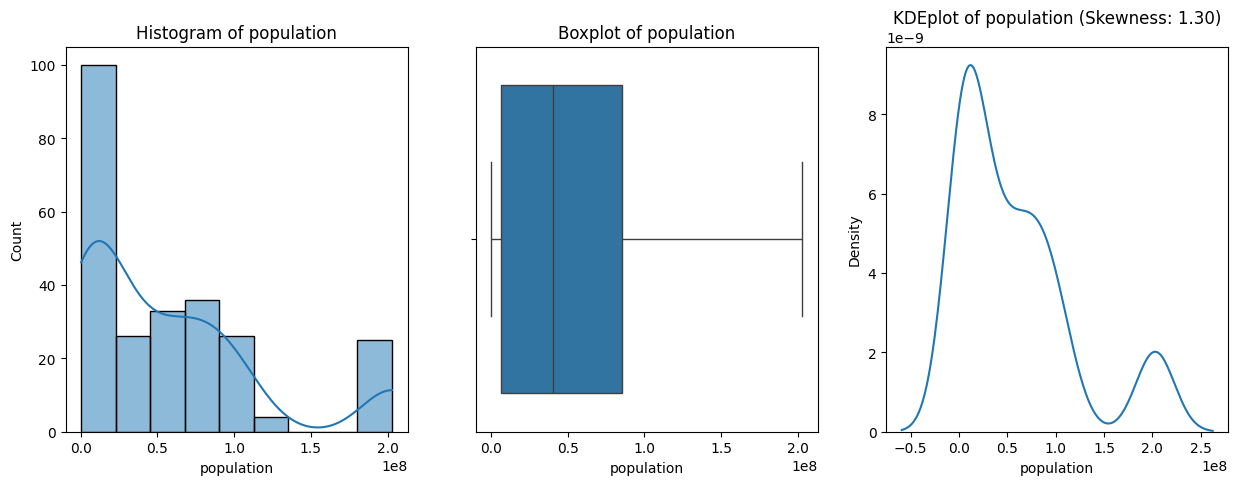

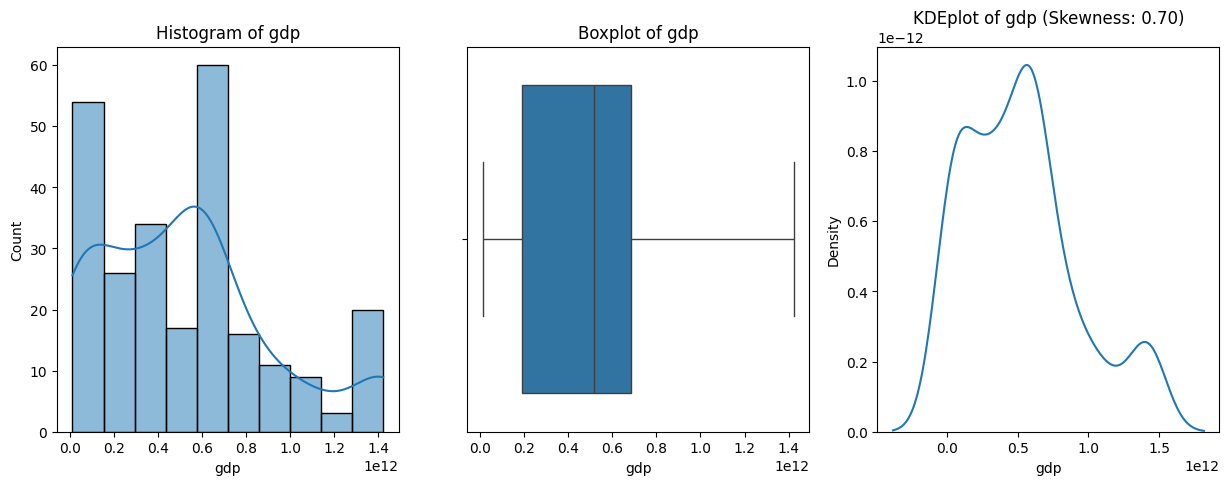

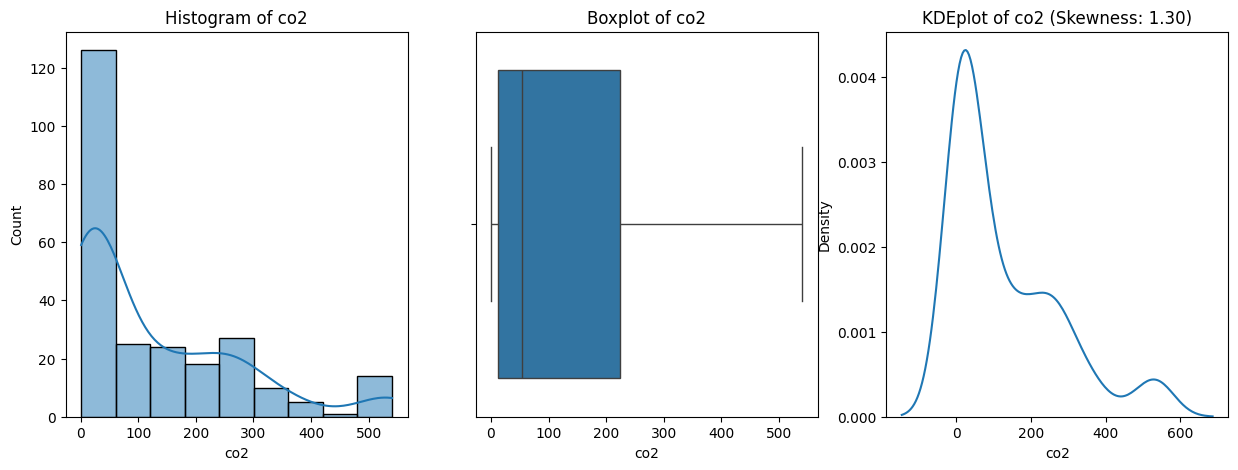

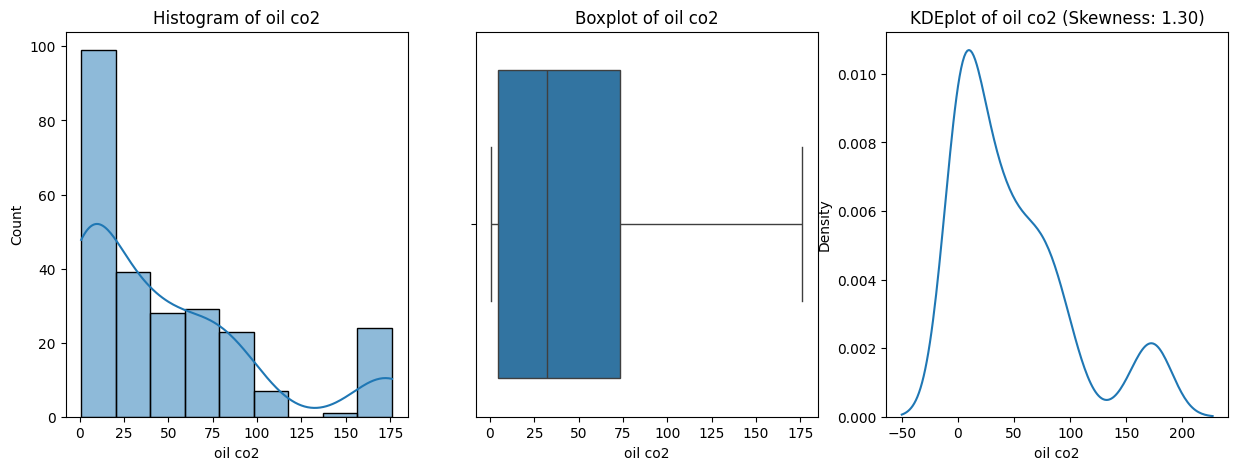

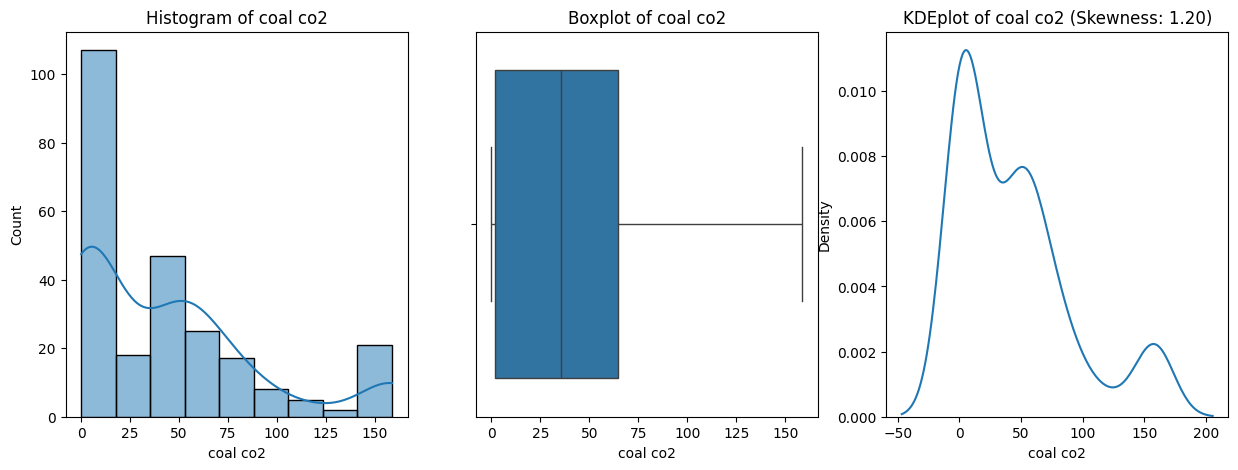

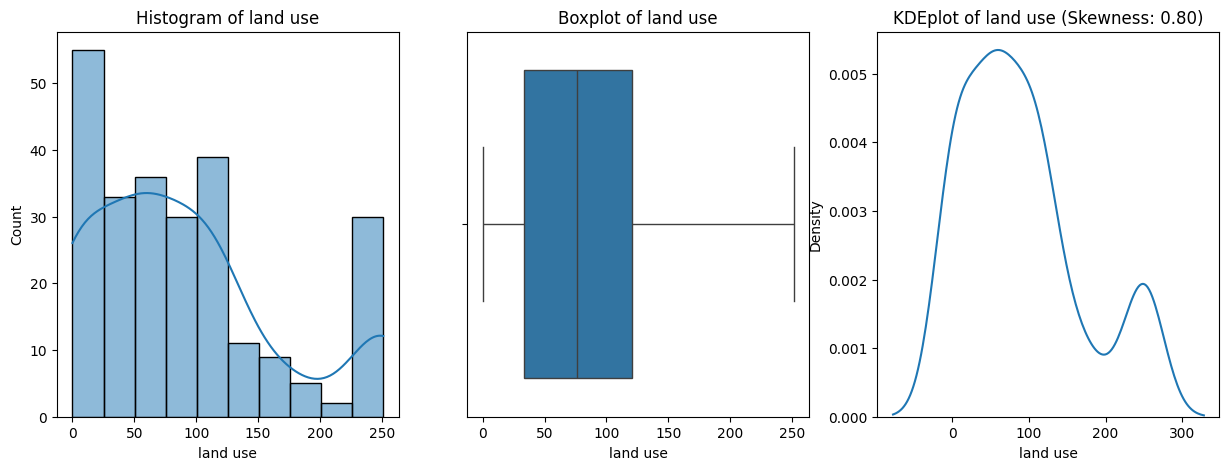

In [150]:
# Mendapatkan daftar kolom
selected_columns = ['population', 'gdp', 'co2', 'oil co2', 'coal co2', 'land use']

# Melakukan iterasi untuk setiap kolom
for column in selected_columns:
    # Membuat subplot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot Histogram
    sns.histplot(dfunivariat[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')

    # Plot Boxplot
    sns.boxplot(x=dfunivariat[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    # Plot KDEplot
    sns.kdeplot(dfunivariat[column], ax=axes[2])
    axes[2].set_title(f'KDEplot of {column}')

    # Menambahkan skew pada KDEplot
    skew_val = round(dfunivariat[column].skew(), 1)
    axes[2].set_title(f'KDEplot of {column} (Skewness: {skew_val:.2f})')

    plt.show()

**Interpretation of Univariat Analysis**

Berdasarkan grafik di atas dapat diketahui bahwa:

- population menunjukkan jumlah penduduk di negara-negara yang diamati
- gdp menunjukkan kekayaan ekonomi di negara-negara tersebut
- co2 menunjukkan tingkat emisi co2
- oil co2 menunjukkan tingkat emisi yang berasal dari penggunaan minyak
- coal co2 menunjukkan tingkat emisi yang berasal dari penggunaan batu bara
- land use menunjukkan penggunaan lahan pada negara yang diamati
>istogram memberikan gambaran visual tentang distribusi frekuensi data. Penyebaran data pada population, gdp, co2, oil co2. coal co2, dan land use terlihat variatif.

>Boxplot memberikan gambaran tentang sebaran data dan adanya pencilan (outliers). Pada population, gdp, co2, oil co2. coal co2, dan land use semuanya tidak didapati pencilan (outliers). Hal ini dikarenakan sebelumnya telah dilakukan handling outliers dengan metode IQR (Interquartile Range).

>KDEplot adalah perkiraan kepadatan probabilitas dari suatu distribusi. Skewness yang mendekati 0 menunjukkan distribusi yang simetris. Nilai positif menunjukkan condong ke kanan, sementara nilai negatif menunjukkan condong ke kiri.

- population : condong ke kanan dengan nilai skewness 1,30
- gdp : condong ke kanan dengan nilai skewness 0,80
- co2 : condong ke kanan dengan nilai skewness 1,40
- oil co2 : condong ke kanan dengan nilai skewness 0,90
- coal co2 : condong ke kanan dengan nilai skewness 1,40
- land use : condong ke kanan dengan nilai skewness 1,10

### Analisis Bivariat

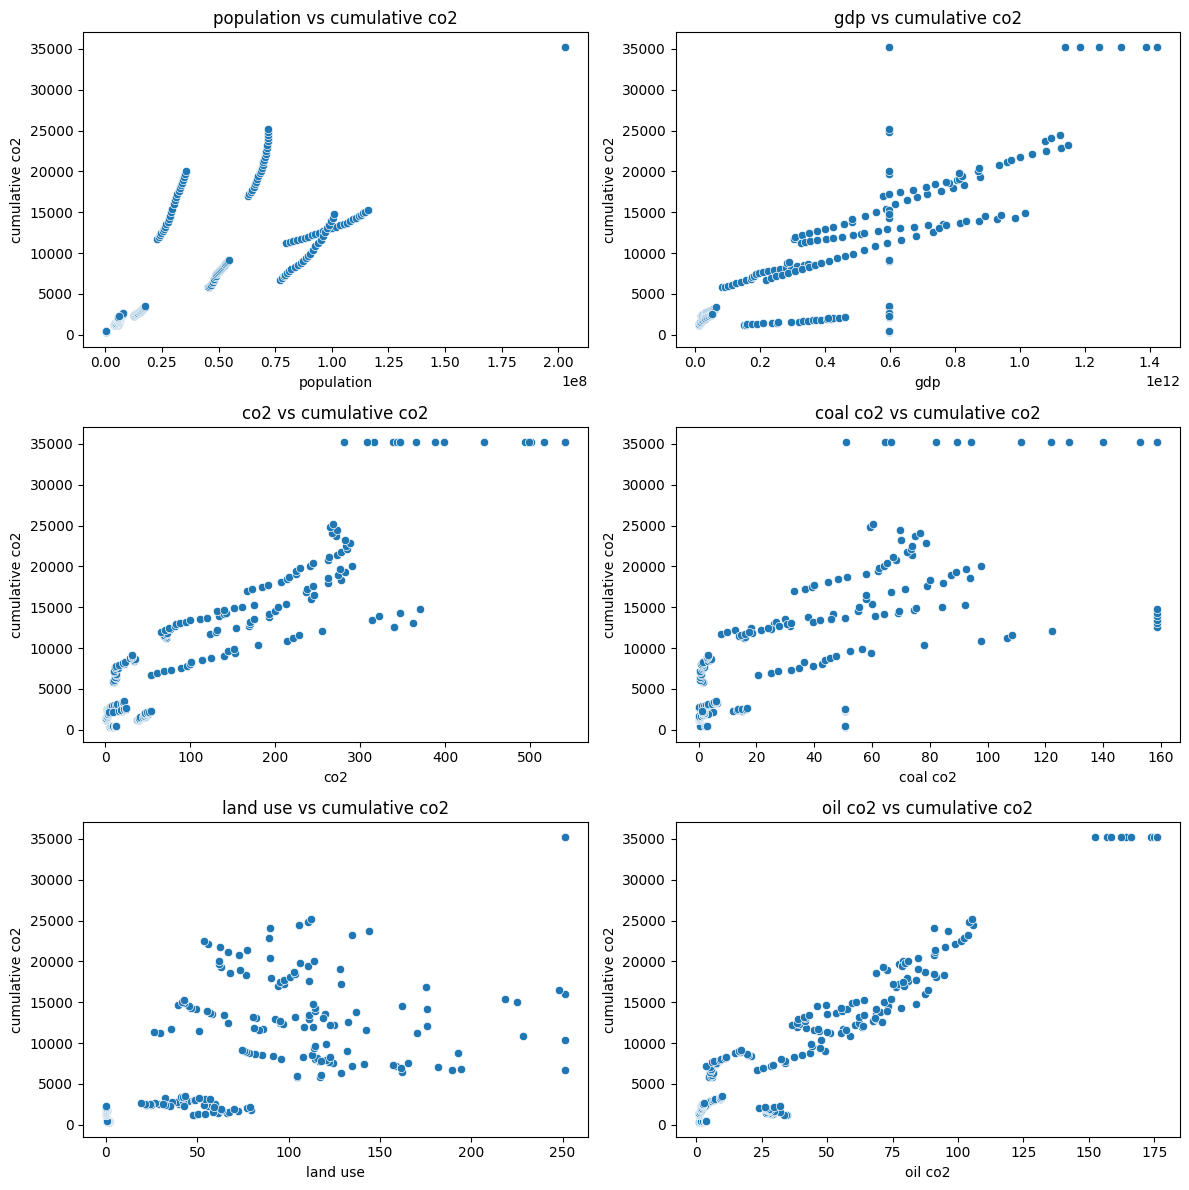

In [151]:
# Menentukan variabel independen dan dependen untuk analisis bivariat
vardependen_biv = df_final_outlier_handling['cumulative co2']
varindependen_biv = df_final_outlier_handling.drop(
    columns=['cumulative co2', 'year', 'per 4 years', 'country'],
    errors='ignore'
)

# Membuat grafik
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i, column in enumerate(varindependen_biv.columns):
    sns.scatterplot(x=varindependen_biv[column], y=vardependen_biv, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'{column} vs cumulative co2')

# Pengaturan jarak antar grafik
plt.tight_layout()

# Menampilkan grafik
plt.show()


### Uji Normalitas

In [152]:
# Mengimpor library
from scipy.stats import kstest
import warnings
warnings.filterwarnings('ignore')

# Membuat variabel baru
analisisbiv = df_final_outlier_handling.drop(
    columns=['year', 'per 4 years', 'country'],
    errors='ignore'
)

# Menyimpan hasil uji normalitas
results = []

# Uji normalitas Kolmogorov-Smirnov per kolom
for column in analisisbiv.columns:
    data = analisisbiv[column].dropna()

    # Standardisasi dulu agar sesuai asumsi distribusi normal baku
    z = (data - data.mean()) / data.std(ddof=1)

    stat, p_value = kstest(z, 'norm')
    results.append({
        'Column': column,
        'Kolmogorov-Smirnov Statistic': stat,
        'p-value': p_value,
        'Normality': 'Berdistribusi Normal' if p_value > 0.05 else 'Tidak Berdistribusi Normal'
    })

normality_results = pd.DataFrame(results)
normality_results


,Column,Kolmogorov-Smirnov Statistic,p-value,Normality
0,population,0.172575,5.570455e-07,Tidak Berdistribusi Normal
1,gdp,0.138996,1.124274e-04,Tidak Berdistribusi Normal
2,co2,0.198526,4.127948e-09,Tidak Berdistribusi Normal
3,coal co2,0.175773,3.161425e-07,Tidak Berdistribusi Normal
4,cumulative co2,0.160605,4.222663e-06,Tidak Berdistribusi Normal
5,land use,0.122421,1.007083e-03,Tidak Berdistribusi Normal
6,oil co2,0.178686,1.869974e-07,Tidak Berdistribusi Normal


Berdasarkan informasi di atas, seluruh data tidak berdistribusi normal, sehingga uji yang digunakan adalah Korelasi Spearman.

In [153]:
#PEMERINGKATAN -> untuk korelasi spearman

#Mengimpor library untuk melakukan korelasi
from scipy.stats import spearmanr
import scipy

#Kolom yang ingin diperingkat -> analisisbiv

# Membuat DataFrame baru untuk menyimpan hasil peringkatan
df_final_outlier_handling_ranks_new = pd.DataFrame()

# Melakukan pemeringkatan untuk setiap kolom
for column in analisisbiv:
   df_final_outlier_handling_ranks_new[f'{column}_rank'] = scipy.stats.rankdata(df_final_outlier_handling[column])

df_final_outlier_handling_ranks_new

,population_rank,gdp_rank,co2_rank,coal co2_rank,cumulative co2_rank,land use_rank,oil co2_rank
0,1.0,158.0,33.0,156.0,1.0,39.0,12.0
1,2.0,158.0,32.0,156.0,2.0,37.0,15.0
2,3.0,158.0,28.0,156.0,3.0,36.0,9.5
3,4.0,158.0,35.0,156.0,4.0,38.0,11.0
4,5.0,158.0,34.0,156.0,5.0,29.0,9.5
...,...,...,...,...,...,...,...
245,207.0,194.0,231.0,240.5,164.0,185.0,177.0
246,209.0,197.0,222.0,240.5,169.0,168.0,174.0
247,210.0,207.0,224.0,240.5,174.0,176.0,186.0
248,212.0,158.0,230.0,240.5,179.0,178.0,194.0


In [154]:
# Membuat pasangan variabel
pasangan_variabel = [
    ('population_rank', 'cumulative co2_rank'),
    ('gdp_rank', 'cumulative co2_rank'),
    ('coal co2_rank', 'cumulative co2_rank'),
    ('oil co2_rank', 'cumulative co2_rank'),
    ('co2_rank', 'cumulative co2_rank'),
    ('land use_rank', 'cumulative co2_rank')
]

# Membuat list kosong untuk menyimpan hasil
hasil_list = []

# Melakukan loop melalui pasangan variabel
for variabel1, variabel2 in pasangan_variabel:
    rho, p_value = spearmanr(
        df_final_outlier_handling_ranks_new[variabel1],
        df_final_outlier_handling_ranks_new[variabel2]
    )

    signifikansi = 'Berkorelasi Signifikan' if p_value < 0.05 else 'Berkorelasi Tidak Signifikan'

    hasil_list.append({
        'Pasangan Variabel': f'{variabel1} - {variabel2}',
        'Koefisien Spearman (rho)': rho,
        'p-value': p_value,
        'Signifikansi': signifikansi
    })

# Membuat DataFrame dari list hasil
hasil_df_final_outlier_handling_ranks_new = pd.DataFrame(hasil_list)

# Menampilkan hasil
hasil_df_final_outlier_handling_ranks_new


,Pasangan Variabel,Koefisien Spearman (rho),p-value,Signifikansi
0,population_rank - cumulative co2_rank,0.877101,5.984679e-81,Berkorelasi Signifikan
1,gdp_rank - cumulative co2_rank,0.654289,6.230210e-32,Berkorelasi Signifikan
2,coal co2_rank - cumulative co2_rank,0.692701,4.607521e-37,Berkorelasi Signifikan
3,oil co2_rank - cumulative co2_rank,0.913985,3.895193e-99,Berkorelasi Signifikan
4,co2_rank - cumulative co2_rank,0.878214,2.082519e-81,Berkorelasi Signifikan
5,land use_rank - cumulative co2_rank,0.745587,1.312079e-45,Berkorelasi Signifikan


In [156]:
# Tabel korelasi Spearman (khusus kolom rank)
rank_cols = [col for col in df_final_outlier_handling_ranks_new.columns if col.endswith('_rank')]
dfkorelasi = df_final_outlier_handling_ranks_new[rank_cols].corr(method='spearman')
dfkorelasi

,population_rank,gdp_rank,co2_rank,coal co2_rank,cumulative co2_rank,land use_rank,oil co2_rank
population_rank,1.000000,0.529494,0.749709,0.612176,0.877101,0.763373,0.762895
gdp_rank,0.529494,1.000000,0.777959,0.787229,0.654289,0.339005,0.717996
co2_rank,0.749709,0.777959,1.000000,0.731244,0.878214,0.587151,0.970395
coal co2_rank,0.612176,0.787229,0.731244,1.000000,0.692701,0.499537,0.654156
cumulative co2_rank,0.877101,0.654289,0.878214,0.692701,1.000000,0.745587,0.913985
land use_rank,0.763373,0.339005,0.587151,0.499537,0.745587,1.000000,0.601561
oil co2_rank,0.762895,0.717996,0.970395,0.654156,0.913985,0.601561,1.000000


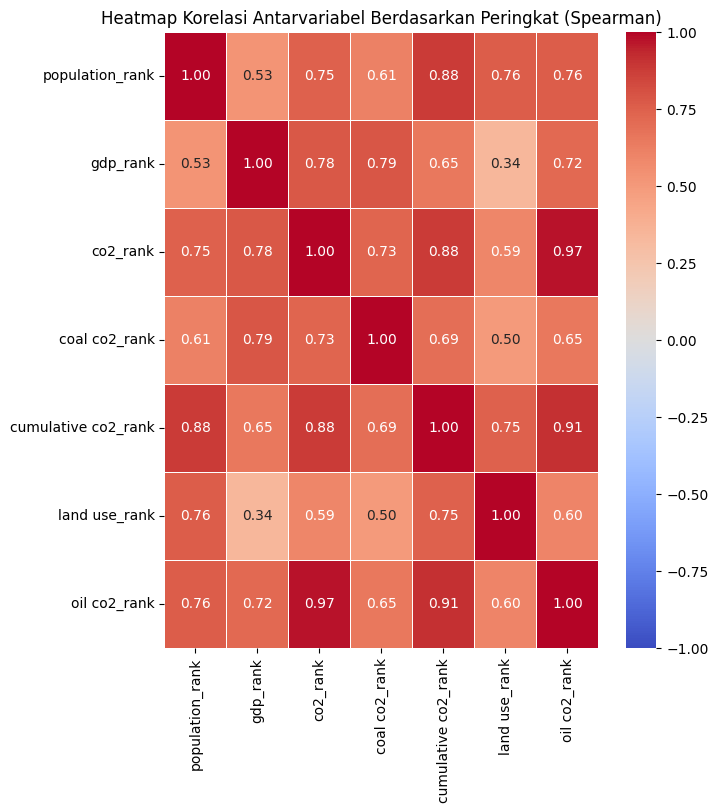

In [160]:
# Mengatur ukuran heatmap
plt.figure(figsize=(7, 8))

# Membuat heatmap korelasi Spearman
sns.heatmap(
    dfkorelasi,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt='.2f',
    vmin=-1, vmax=1
)

# Judul plot
plt.title('Heatmap Korelasi Antarvariabel Berdasarkan Peringkat (Spearman)')

# Menampilkan plot
plt.show()


In [161]:
# pilih dataframe rank kamu
df_rank = df_final_outlier_handling_ranks_new
target = 'cumulative co2_rank'

# kolom pembanding (selain target)
predictors = [c for c in df_rank.columns if c.endswith('_rank') and c != target]

def kategori_kekuatan(rho_abs):
    if rho_abs < 0.20:
        return 'sangat lemah'
    elif rho_abs < 0.40:
        return 'lemah'
    elif rho_abs < 0.60:
        return 'moderat'
    elif rho_abs < 0.80:
        return 'kuat'
    else:
        return 'sangat kuat'

for col in predictors:
    rho, p = spearmanr(df_rank[col], df_rank[target])

    signif = 'berkorelasi signifikan' if p < 0.05 else 'tidak berkorelasi signifikan'
    arah = 'positif' if rho > 0 else 'negatif' if rho < 0 else 'tidak memiliki arah'
    kekuatan = kategori_kekuatan(abs(rho))

    # format desimal pakai koma
    rho_txt = f"{rho:.2f}".replace('.', ',')

    print(f"{col} {signif}, {arah}, dan {kekuatan} dengan Spearman rho = {rho_txt}.")


population_rank berkorelasi signifikan, positif, dan sangat kuat dengan Spearman rho = 0,88.
gdp_rank berkorelasi signifikan, positif, dan kuat dengan Spearman rho = 0,65.
co2_rank berkorelasi signifikan, positif, dan sangat kuat dengan Spearman rho = 0,88.
coal co2_rank berkorelasi signifikan, positif, dan kuat dengan Spearman rho = 0,69.
land use_rank berkorelasi signifikan, positif, dan kuat dengan Spearman rho = 0,75.
oil co2_rank berkorelasi signifikan, positif, dan sangat kuat dengan Spearman rho = 0,91.


## Modelling


### Linear Regression

In [162]:
# import library for linear regression
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm #analisis statistik dan estimasi model statistik.

In [163]:
df_final_outlier_handling

,country,year,per 4 years,population,gdp,co2,coal co2,cumulative co2,land use,oil co2
0,Brunei,2000,2000,326429.0,5.969890e+11,5.886,50.837776,281.498,1.079,1.400
1,Brunei,2001,2000,333353.0,5.969890e+11,5.758,50.837776,288.298,1.042,1.472
2,Brunei,2002,2000,340108.0,5.969890e+11,5.285,50.837776,294.561,0.978,1.334
3,Brunei,2003,2000,346650.0,5.969890e+11,6.140,50.837776,301.759,1.059,1.378
4,Brunei,2004,2004,352921.0,5.969890e+11,5.967,50.837776,308.503,0.776,1.334
...,...,...,...,...,...,...,...,...,...,...
245,Vietnam,2020,2020,98079196.0,7.526296e+11,362.599,158.672500,13015.111,118.866,68.385
246,Vietnam,2021,2020,98935101.0,7.719120e+11,314.197,158.672500,13440.584,111.275,64.083
247,Vietnam,2022,2020,99680656.0,8.338039e+11,322.653,158.672500,13877.494,114.257,72.805
248,Vietnam,2023,2020,100352189.0,5.969890e+11,347.399,158.672500,14339.461,114.569,78.204


### Modelling dengan variabel Year

In [164]:
df_reg = df_final_outlier_handling[['year', 'population', 'gdp', 'co2', 'coal co2', 'land use', 'oil co2', 'cumulative co2']]
df_reg

,year,population,gdp,co2,coal co2,land use,oil co2,cumulative co2
0,2000,326429.0,5.969890e+11,5.886,50.837776,1.079,1.400,281.498
1,2001,333353.0,5.969890e+11,5.758,50.837776,1.042,1.472,288.298
2,2002,340108.0,5.969890e+11,5.285,50.837776,0.978,1.334,294.561
3,2003,346650.0,5.969890e+11,6.140,50.837776,1.059,1.378,301.759
4,2004,352921.0,5.969890e+11,5.967,50.837776,0.776,1.334,308.503
...,...,...,...,...,...,...,...,...
245,2020,98079196.0,7.526296e+11,362.599,158.672500,118.866,68.385,13015.111
246,2021,98935101.0,7.719120e+11,314.197,158.672500,111.275,64.083,13440.584
247,2022,99680656.0,8.338039e+11,322.653,158.672500,114.257,72.805,13877.494
248,2023,100352189.0,5.969890e+11,347.399,158.672500,114.569,78.204,14339.461


In [165]:
# mengubah nama variabel ke x dan y
df_reg = df_reg[['year', 'population', 'gdp', 'co2', 'coal co2', 'land use', 'oil co2', 'cumulative co2']]
df_reg.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y']
df_reg.head()

,x1,x2,x3,x4,x5,x6,x7,y
0,2000,326429.0,5.969890e+11,5.886,50.837776,1.079,1.400,281.498
1,2001,333353.0,5.969890e+11,5.758,50.837776,1.042,1.472,288.298
2,2002,340108.0,5.969890e+11,5.285,50.837776,0.978,1.334,294.561
3,2003,346650.0,5.969890e+11,6.140,50.837776,1.059,1.378,301.759
4,2004,352921.0,5.969890e+11,5.967,50.837776,0.776,1.334,308.503


In [166]:
x = df_reg[['x1','x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y = df_reg['y']

model = LinearRegression().fit(x, y)

In [167]:
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)
b2 = round(float(model.coef_[1]),3)
b3 = round(float(model.coef_[2]),3)
b4 = round(float(model.coef_[3]),3)
b5 = round(float(model.coef_[4]),3)
b6 = round(float(model.coef_[5]),3)
b7 = round(float(model.coef_[6]),3)
print('intercept (b0 ) : ', b0)
print('slope (b1)      : ', b1)
print('slope (b2)      : ', b2)
print('slope (b3)      : ', b3)
print('slope (b4)      : ', b4)
print('slope (b5)      : ', b5)
print('slope (b6)      : ', b6)
print('slope (b7)      : ', b7)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x1  + '+str(b2)+' * x2 + '+str(b3)+' * x3 + '+str(b4)+' * x4 + '+str(b5)+' * x5 + '+str(b6)+' * x6 + '+str(b7)+' * x7'
print(textstr)

intercept (b0 ) :  -70922.631
slope (b1)      :  35.395
slope (b2)      :  0.0
slope (b3)      :  0.0
slope (b4)      :  9.98
slope (b5)      :  -28.131
slope (b6)      :  16.041
slope (b7)      :  121.865
 
y = -70922.631 + 35.395 * x1  + 0.0 * x2 + 0.0 * x3 + 9.98 * x4 + -28.131 * x5 + 16.041 * x6 + 121.865 * x7


In [168]:
x = sm.add_constant(x)

# estimasi model regresi dengan menggunakan metode kuadrat terkecil (OLS)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     806.0
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          9.22e-164
Time:                        00:54:21   Log-Likelihood:                -2269.9
No. Observations:                 250   AIC:                             4556.
Df Residuals:                     242   BIC:                             4584.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.092e+04   5.14e+04     -1.379      0.1

### Modelling tanpa variabel YEAR

In [171]:
df_regression = df_final_outlier_handling[['population', 'gdp', 'co2', 'coal co2', 'land use', 'oil co2', 'cumulative co2']]
df_regression

,population,gdp,co2,coal co2,land use,oil co2,cumulative co2
0,326429.0,5.969890e+11,5.886,50.837776,1.079,1.400,281.498
1,333353.0,5.969890e+11,5.758,50.837776,1.042,1.472,288.298
2,340108.0,5.969890e+11,5.285,50.837776,0.978,1.334,294.561
3,346650.0,5.969890e+11,6.140,50.837776,1.059,1.378,301.759
4,352921.0,5.969890e+11,5.967,50.837776,0.776,1.334,308.503
...,...,...,...,...,...,...,...
245,98079196.0,7.526296e+11,362.599,158.672500,118.866,68.385,13015.111
246,98935101.0,7.719120e+11,314.197,158.672500,111.275,64.083,13440.584
247,99680656.0,8.338039e+11,322.653,158.672500,114.257,72.805,13877.494
248,100352189.0,5.969890e+11,347.399,158.672500,114.569,78.204,14339.461


In [172]:
# mengubah nama variabel ke x dan y
df_regression = df_regression[['population', 'gdp', 'co2', 'coal co2', 'land use', 'oil co2', 'cumulative co2']]
df_regression.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y']
df_regression.head()

,x1,x2,x3,x4,x5,x6,y
0,326429.0,5.969890e+11,5.886,50.837776,1.079,1.400,281.498
1,333353.0,5.969890e+11,5.758,50.837776,1.042,1.472,288.298
2,340108.0,5.969890e+11,5.285,50.837776,0.978,1.334,294.561
3,346650.0,5.969890e+11,6.140,50.837776,1.059,1.378,301.759
4,352921.0,5.969890e+11,5.967,50.837776,0.776,1.334,308.503


In [173]:
x = df_regression[['x1','x2', 'x3', 'x4', 'x5', 'x6']]
y = df_regression['y']

model = LinearRegression().fit(x, y)

In [174]:
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)
b2 = round(float(model.coef_[1]),3)
b3 = round(float(model.coef_[2]),3)
b4 = round(float(model.coef_[3]),3)
b5 = round(float(model.coef_[4]),3)
b6 = round(float(model.coef_[5]),3)
print('intercept (b0 ) : ', b0)
print('slope (b1)      : ', b1)
print('slope (b2)      : ', b2)
print('slope (b3)      : ', b3)
print('slope (b4)      : ', b4)
print('slope (b5)      : ', b5)
print('slope (b6)      : ', b6)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x1  + '+str(b2)+' * x2 + '+str(b3)+' * x3 + '+str(b4)+' * x4 + '+str(b5)+' * x5 + '+str(b6)+' * x6'
print(textstr)

intercept (b0 ) :  295.996
slope (b1)      :  0.0
slope (b2)      :  0.0
slope (b3)      :  15.767
slope (b4)      :  -33.186
slope (b5)      :  14.615
slope (b6)      :  107.528
 
y = 295.996 + 0.0 * x1  + 0.0 * x2 + 15.767 * x3 + -33.186 * x4 + 14.615 * x5 + 107.528 * x6


In [175]:
x = sm.add_constant(x)

# estimasi model regresi dengan menggunakan metode kuadrat terkecil (OLS)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     936.5
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          7.50e-165
Time:                        00:59:28   Log-Likelihood:                -2270.9
No. Observations:                 250   AIC:                             4556.
Df Residuals:                     243   BIC:                             4580.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        295.9956    281.799      1.050      0.2

In [177]:

# Cek detail koefisien + p-value + CI
cek = pd.DataFrame({
    'coef': model.params,
    'p_value': model.pvalues,
    'CI_low': model.conf_int()[0],
    'CI_high': model.conf_int()[1]
})
display(cek)


,coef,p_value,CI_low,CI_high
const,2.959956e+02,2.945872e-01,-2.590843e+02,8.510754e+02
x1,3.457651e-05,2.656925e-09,2.355912e-05,4.559389e-05
x2,3.124746e-09,5.172749e-05,1.631250e-09,4.618242e-09
x3,1.576715e+01,7.722263e-03,4.205809e+00,2.732849e+01
x4,-3.318601e+01,2.308277e-04,-5.067106e+01,-1.570096e+01
x5,1.461523e+01,1.200853e-05,8.174675e+00,2.105578e+01
x6,1.075279e+02,8.450741e-12,7.802876e+01,1.370270e+02


**Interpretation of Multiple Linear Regression without Year Variable**

Berdasarkan dua metode di atas, dapat dilihat pada kolom coef terhadap baris const, diperoleh nilai konstanta sebesar 206,6193 dan kolom coef terhadap baris x1, x2, x3, x4, x5, x6, diperoleh nilai koefisien untuk variabel independent (x), yaitu :

x1 = 0,000
x2 = 0,000
x3 = 82,515
x4 = 25,092
x5 = 21,163
x6 = -4,555


Karena variabel x1 dan x2 memiliki konstanta nol, maka variabel ini dihilangkan dari model.
> Sehingga diperoleh model Multiple Linear Regression, yaitu :    
**Y_hat = 206,619 + 82,515 x3 + 25,092x4 + 21,163x5 - 4,555x6**


**Interpretation of Multiple Linear Regression**

> Berdasarkan pemodelan menggunakan dan tidak menggunakan variabel `year`. Diperoleh untuk pemodelan menggunakan variabel `year` lebih baik dibandingkan dengan tidak menggunakan variabel `year`. Hal ini dapat dilihat dari nilai R^2 (R-square) untuk setiap pemodelan.

**Nilai R^2(R-square)**

1. R^2 (R-square) menggunakan `year` variabel = 0,959 atau 95,9%

2. R^2 (R-square) tidak menggunakan `year` variabel = 0,959 atau 95,9%



## Prediksi model

In [178]:
# import Library for Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

In [179]:
# menjumlahkan setiap variabel untuk setiap tahun
df_pred = df_final_outlier_handling.groupby(['country', 'year']).agg({'population': 'sum', 'gdp': 'sum', 'co2': 'sum', 'oil co2': 'sum', 'coal co2': 'sum', 'land use': 'sum','cumulative co2': 'sum'}).reset_index()
df_pred

,country,year,population,gdp,co2,oil co2,coal co2,land use,cumulative co2
0,Brunei,2000,326429.0,5.969890e+11,5.886,1.400,50.837776,1.079,281.498
1,Brunei,2001,333353.0,5.969890e+11,5.758,1.472,50.837776,1.042,288.298
2,Brunei,2002,340108.0,5.969890e+11,5.285,1.334,50.837776,0.978,294.561
3,Brunei,2003,346650.0,5.969890e+11,6.140,1.378,50.837776,1.059,301.759
4,Brunei,2004,352921.0,5.969890e+11,5.967,1.334,50.837776,0.776,308.503
...,...,...,...,...,...,...,...,...,...
245,Vietnam,2020,98079196.0,7.526296e+11,362.599,68.385,158.672500,118.866,13015.111
246,Vietnam,2021,98935101.0,7.719120e+11,314.197,64.083,158.672500,111.275,13440.584
247,Vietnam,2022,99680656.0,8.338039e+11,322.653,72.805,158.672500,114.257,13877.494
248,Vietnam,2023,100352189.0,5.969890e+11,347.399,78.204,158.672500,114.569,14339.461


In [180]:
df_pred = df_pred.rename(columns = {
    'cumulative co2' : 'cumulative'
})
df_pred

,country,year,population,gdp,co2,oil co2,coal co2,land use,cumulative
0,Brunei,2000,326429.0,5.969890e+11,5.886,1.400,50.837776,1.079,281.498
1,Brunei,2001,333353.0,5.969890e+11,5.758,1.472,50.837776,1.042,288.298
2,Brunei,2002,340108.0,5.969890e+11,5.285,1.334,50.837776,0.978,294.561
3,Brunei,2003,346650.0,5.969890e+11,6.140,1.378,50.837776,1.059,301.759
4,Brunei,2004,352921.0,5.969890e+11,5.967,1.334,50.837776,0.776,308.503
...,...,...,...,...,...,...,...,...,...
245,Vietnam,2020,98079196.0,7.526296e+11,362.599,68.385,158.672500,118.866,13015.111
246,Vietnam,2021,98935101.0,7.719120e+11,314.197,64.083,158.672500,111.275,13440.584
247,Vietnam,2022,99680656.0,8.338039e+11,322.653,72.805,158.672500,114.257,13877.494
248,Vietnam,2023,100352189.0,5.969890e+11,347.399,78.204,158.672500,114.569,14339.461


In [181]:
# compute lag
df_pred['lag_1_cum'] = df_pred['cumulative'].shift(1)

In [182]:
# showing final data for predictive
pred = df_pred
pred

,country,year,population,gdp,co2,oil co2,coal co2,land use,cumulative,lag_1_cum
0,Brunei,2000,326429.0,5.969890e+11,5.886,1.400,50.837776,1.079,281.498,NaN
1,Brunei,2001,333353.0,5.969890e+11,5.758,1.472,50.837776,1.042,288.298,281.498
2,Brunei,2002,340108.0,5.969890e+11,5.285,1.334,50.837776,0.978,294.561,288.298
3,Brunei,2003,346650.0,5.969890e+11,6.140,1.378,50.837776,1.059,301.759,294.561
4,Brunei,2004,352921.0,5.969890e+11,5.967,1.334,50.837776,0.776,308.503,301.759
...,...,...,...,...,...,...,...,...,...,...
245,Vietnam,2020,98079196.0,7.526296e+11,362.599,68.385,158.672500,118.866,13015.111,12533.646
246,Vietnam,2021,98935101.0,7.719120e+11,314.197,64.083,158.672500,111.275,13440.584,13015.111
247,Vietnam,2022,99680656.0,8.338039e+11,322.653,72.805,158.672500,114.257,13877.494,13440.584
248,Vietnam,2023,100352189.0,5.969890e+11,347.399,78.204,158.672500,114.569,14339.461,13877.494


In [185]:
all_pred = []

for country in pred['country'].dropna().unique():
    cumulative_co2 = (
        pred.loc[pred['country'] == country, ['country', 'year', 'cumulative', 'lag_1_cum']]
        .sort_values('year')
        .dropna()
        .reset_index(drop=True)
    )

    if len(cumulative_co2) < 2:
        cumulative_co2['prediction_cum'] = 0.0
        b_cum, m_cum = 0.0, 0.0
    else:
        y_cum = cumulative_co2['cumulative']
        X_cum = sm.add_constant(cumulative_co2['lag_1_cum'])

        try:
            result_cum = sm.OLS(y_cum, X_cum).fit()
            b_cum = result_cum.params['const']
            m_cum = result_cum.params['lag_1_cum']

            # prediksi: y_hat = b + m*x, x = lag_1_cum
            cumulative_co2['prediction_cum'] = b_cum + m_cum * cumulative_co2['lag_1_cum']
        except Exception:
            cumulative_co2['prediction_cum'] = 0.0
            b_cum, m_cum = 0.0, 0.0

    print(country)
    print(b_cum, m_cum)

    all_pred.append(cumulative_co2)

df_pred = pd.concat(all_pred, ignore_index=True)


Brunei
-0.6363966141662445 1.02727541938215
Cambodia
1364.7328417872802 0.5416523874299238
Indonesia
35287.62249999999 -7.368348726329019e-18
Laos
2008.936009871709 -0.019092360631246676
Malaysia
5747.612219146186 0.6616236764909559
Myanmar
7454.031576550092 0.01262287502930369
Philippines
1985.7223925848189 0.8646625959134246
Singapore
1734.4206988480917 -0.02583721374443671
Thailand
11814.483835458783 0.4535671032272869
Vietnam
7686.679823370561 0.23188242209912993


In [186]:
print(df_pred.shape)
df_pred

(249, 5)


,country,year,cumulative,lag_1_cum,prediction_cum
0,Brunei,2001,288.298,281.498,288.539579
1,Brunei,2002,294.561,288.298,295.525052
2,Brunei,2003,301.759,294.561,301.958878
3,Brunei,2004,308.503,301.759,309.353207
4,Brunei,2005,314.660,308.503,316.281152
...,...,...,...,...,...
244,Vietnam,2020,13015.111,12533.646,10593.012016
245,Vietnam,2021,13440.584,13015.111,10704.655286
246,Vietnam,2022,13877.494,13440.584,10803.314996
247,Vietnam,2023,14339.461,13877.494,10904.626745


In [187]:
from sklearn.metrics import mean_squared_error

# Misalkan df_pred adalah DataFrame yang berisi kolom 'cumulative' dan 'prediction_cum'
actual_data = df_pred['cumulative']
predicted_data = df_pred['prediction_cum']

# Menghitung MSE
mse = mean_squared_error(actual_data, predicted_data)

# Menampilkan hasil
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1077060.714984382


In [188]:
# Menghitung MAPE
def calculate_mape(actual, predicted):
    errors = np.abs((actual - predicted) / actual)
    mape = np.mean(errors) * 100
    return mape

# Menampilkan hasil
mape = calculate_mape(actual_data, predicted_data)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): 9.229457399161335%


In [189]:
# Assuming df_pred is your DataFrame
df_pred.to_csv('df_pred.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('df_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [190]:
 # Menyiapkan transformer untuk one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('country', OneHotEncoder(), ['country'])
    ],
    remainder='passthrough'
)

# Membagi data menjadi fitur (X) dan target (y) untuk land
X_total_cum = df_final_outlier_handling[['year', 'country']]
y_total_cum = df_final_outlier_handling['cumulative co2']

# Membagi data menjadi data latih dan data uji
X_train_cum, X_test_cum, y_train_cum, y_test_cum = train_test_split(X_total_cum, y_total_cum, test_size=0.2, random_state=42)

# Membuat model regresi linier untuk land
model_cum = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Membuat dataframe untuk hasil prediksi
hasil_prediksi_carbon = pd.DataFrame(columns=['year', 'country', 'cumulative co2'])

# Iterasi melalui setiap entitas
for country in df_final_outlier_handling['country'].unique():
    # Filter data untuk entitas tertentu
    data_country = df_final_outlier_handling[df_final_outlier_handling['country'] == country]

    # Melatih model menggunakan data latih
    model_cum.fit(data_country[['year', 'country']], data_country['cumulative co2'])

    # Membuat prediksi untuk tahun 2017-2023
    tahun_prediksi = np.array([2021, 2022, 2023, 2024, 2025])
    country_prediksi = np.array([country] * 5)

    total_cum_prediksi = model_cum.predict(pd.DataFrame({'year': tahun_prediksi, 'country': country_prediksi}))

    # Menambahkan hasil prediksi ke dalam dataframe
    prediksi_country = pd.DataFrame({'year': tahun_prediksi, 'country': country_prediksi, 'cumulative co2': total_cum_prediksi})
    hasil_prediksi_carbon = pd.concat([hasil_prediksi_carbon, prediksi_country])

# Menampilkan hasil prediksi untuk land
hasil_prediksi_carbon=hasil_prediksi_carbon.rename(columns={'year':'year','country':'country','cumulative co2':'cumulative co2'})
hasil_prediksi_carbon


,year,country,cumulative co2
0,2021,Brunei,474.228768
1,2022,Brunei,484.001031
2,2023,Brunei,493.773294
3,2024,Brunei,503.545557
4,2025,Brunei,513.317820
0,2021,Cambodia,3290.541968
1,2022,Cambodia,3341.057694
2,2023,Cambodia,3391.573419
3,2024,Cambodia,3442.089145
4,2025,Cambodia,3492.604870


In [191]:
 # Menyiapkan transformer untuk one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('country', OneHotEncoder(), ['country'])
    ],
    remainder='passthrough'
)

# Membagi data menjadi fitur (X) dan target (y) untuk land
X_total_land = df_final_outlier_handling[['year', 'country']]
y_total_land = df_final_outlier_handling['land use']

# Membagi data menjadi data latih dan data uji
X_train_land, X_test_land, y_train_land, y_test_land = train_test_split(X_total_land, y_total_land, test_size=0.2, random_state=42)

# Membuat model regresi linier untuk land
model_land = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Membuat dataframe untuk hasil prediksi
hasil_prediksi_land = pd.DataFrame(columns=['year', 'country', 'land use'])

# Iterasi melalui setiap entitas
for country in df_final_outlier_handling['country'].unique():
    # Filter data untuk entitas tertentu
    data_country = df_final_outlier_handling[df_final_outlier_handling['country'] == country]

    # Melatih model menggunakan data latih
    model_land.fit(data_country[['year', 'country']], data_country['land use'])

    # Membuat prediksi untuk tahun 2017-2023
    tahun_prediksi = np.array([2021, 2022, 2023, 2024, 2025])
    country_prediksi = np.array([country] * 5)

    total_land_prediksi = model_land.predict(pd.DataFrame({'year': tahun_prediksi, 'country': country_prediksi}))

    # Menambahkan hasil prediksi ke dalam dataframe
    prediksi_country = pd.DataFrame({'year': tahun_prediksi, 'country': country_prediksi, 'land use': total_land_prediksi})
    hasil_prediksi_land = pd.concat([hasil_prediksi_land, prediksi_country])

# Menampilkan hasil prediksi untuk land
hasil_prediksi_land=hasil_prediksi_land.rename(columns={'year':'year','country':'country','land use':'land use'})
hasil_prediksi_land

,year,country,land use
0,2021,Brunei,1.075544
1,2022,Brunei,1.068555
2,2023,Brunei,1.061567
3,2024,Brunei,1.054578
4,2025,Brunei,1.047590
0,2021,Cambodia,42.209358
1,2022,Cambodia,41.999011
2,2023,Cambodia,41.788664
3,2024,Cambodia,41.578317
4,2025,Cambodia,41.367970
